In [1]:
import pandas as pd
import numpy as np
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
from sklearn.preprocessing import Imputer
import sys
sys.path.append('icd9')
from icd9 import ICD9
import re
import pickle
import seaborn as sns

In [2]:
with open('clean_data/df.pkl', 'rb') as f:
        df = pickle.load(f)
with open('clean_data/df_labels.pkl', 'rb') as f:
        df_labels = pickle.load(f)

In [3]:
df_labels

{'race': [nan, 'AfricanAmerican', 'Asian', 'Caucasian', 'Hispanic', 'Other'],
 'gender': [nan, 'Female', 'Male'],
 'age': ['[0-10)',
  '[10-20)',
  '[20-30)',
  '[30-40)',
  '[40-50)',
  '[50-60)',
  '[60-70)',
  '[70-80)',
  '[80-90)',
  '[90-100)'],
 'admission_type_id': {0: nan,
  1: 'Emergency',
  2: 'Urgent',
  3: 'Elective',
  4: 'Newborn',
  7: 'Trauma Center'},
 'discharge_disposition_id': {0: nan,
  1: 'Discharged to home',
  2: 'Discharged/transferred to another short term hospital',
  3: 'Discharged/transferred to SNF',
  4: 'Discharged/transferred to ICF',
  5: 'Discharged/transferred to another type of inpatient care institution',
  6: 'Discharged/transferred to home with home health service',
  7: 'Left AMA',
  8: 'Discharged/transferred to home under care of Home IV provider',
  9: 'Admitted as an inpatient to this hospital',
  10: 'Neonate discharged to another hospital for neonatal aftercare',
  11: 'Expired',
  12: 'Still patient or expected to return for outpatient s

In [4]:
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,level_4_diag_1_na,level_5_diag_1_na,level_2_diag_2_na,level_3_diag_2_na,level_4_diag_2_na,level_5_diag_2_na,level_2_diag_3_na,level_3_diag_3_na,level_4_diag_3_na,level_5_diag_3_na
0,2278392,8222157,3,1,0,0,0,1,1,0,...,0,0,1,1,1,1,1,1,1,1
1,149190,55629189,3,1,1,1,1,7,3,0,...,0,0,0,0,0,0,0,0,0,0
2,64410,86047875,1,1,2,1,1,7,2,0,...,0,0,0,0,0,0,0,0,0,0
3,500364,82442376,3,2,3,1,1,7,2,0,...,0,0,0,0,0,0,0,0,0,0
4,16680,42519267,3,2,4,1,1,7,1,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'race_na', 'gender_na', 'admission_type_id_na',
       'discharge_disposition_id_na', 'admission_source_id_na',
       'medical_

In [6]:
A1Cresult = pd.crosstab(df.readmitted, df.A1Cresult)
A1Cresult.columns = df_labels['A1Cresult']
A1Cresult.index = df_labels['readmitted']
A1Cresult_n = A1Cresult / A1Cresult.sum()
A1Cresult_n

,nan,Norm,>7,>8
NO,0.534785,0.582966,0.558499,0.548199
<30,0.114233,0.096593,0.100472,0.098710
>30,0.350982,0.320441,0.341028,0.353092


In [31]:
A1Cresult

,nan,Norm,>7,>8
NO,45322,2909,2129,4504
<30,9681,482,383,811
>30,29745,1599,1300,2901


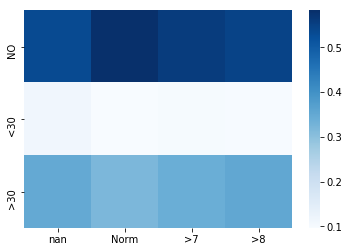

In [7]:
ax = sns.heatmap(A1Cresult_n, cmap='Blues')

In [8]:
A1Cresult.sum()

NaN     84748
Norm     4990
>7       3812
>8       8216
dtype: int64

In [9]:
A1Cresult.transpose() / A1Cresult.transpose().sum()

,NO,<30,>30
NaN,0.826079,0.852426,0.836827
Norm,0.053022,0.042441,0.044985
>7,0.038805,0.033724,0.036573
>8,0.082094,0.071410,0.081615


In [10]:
by_gender = pd.crosstab(df.readmitted, df.gender)
by_gender.columns = df_labels['gender']
by_gender.index = df_labels['readmitted']
by_gender_n = by_gender / by_gender.sum()
by_gender_n

,nan,Female,Male
NO,1.0,0.530782,0.548783
<30,0.0,0.112452,0.110615
>30,0.0,0.356767,0.340601


In [11]:
by_race = pd.crosstab(df.readmitted, df.race)
by_race.columns = df_labels['race']
by_race.index = df_labels['readmitted']
by_race_n = by_race / by_race.sum()
by_race_n

,nan,AfricanAmerican,Asian,Caucasian,Hispanic,Other
NO,0.680598,0.542478,0.647426,0.530664,0.580756,0.607570
<30,0.082710,0.112181,0.101404,0.112906,0.104075,0.096282
>30,0.236692,0.345341,0.251170,0.356430,0.315169,0.296149


In [12]:
by_diag1 = pd.crosstab(df.readmitted, df.diag_1)
by_diag1.columns = df_labels['diag_1']
by_diag1.index = df_labels['readmitted']
by_diag1_n = by_diag1 / by_diag1.sum()
by_diag1_n

,nan,10,11,110,112,114,115,117,131,133,...,V55,V56,V57,V58,V60,V63,V66,V67,V70,V71
NO,0.571429,1.0,0.7,0.5,0.452055,0.0,1.0,0.555556,0.0,1.0,...,0.563380,0.4375,0.512842,0.289474,0.0,0.750,1.0,0.0,1.0,0.777778
<30,0.238095,0.0,0.0,0.0,0.191781,0.0,0.0,0.000000,0.0,0.0,...,0.028169,0.0625,0.135046,0.416667,1.0,0.125,0.0,0.0,0.0,0.000000
>30,0.190476,0.0,0.3,0.5,0.356164,1.0,0.0,0.444444,1.0,0.0,...,0.408451,0.5000,0.352113,0.293860,0.0,0.125,0.0,1.0,0.0,0.222222


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f520bf97f60>,
      dtype=object)

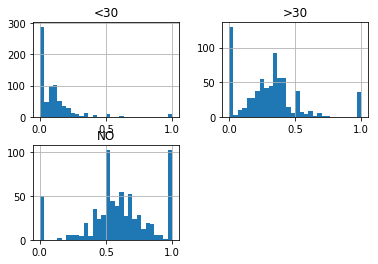

In [15]:
by_diag1_n.transpose().hist(bins=30)

In [ ]:
plt.plot()

In [19]:
by_time_in_hospital = pd.crosstab(df.readmitted, df.time_in_hospital)
by_time_in_hospital.index = df_labels['readmitted']
by_time_in_hospital_n = by_time_in_hospital / by_time_in_hospital.sum()
by_time_in_hospital_n

time_in_hospital,1,2,3,4,5,6,7,8,9,10,11,12,13,14
NO,0.603533,0.556955,0.550631,0.518242,0.519868,0.508688,0.509302,0.495787,0.496669,0.498719,0.518059,0.508978,0.528926,0.507678
<30,0.081785,0.099396,0.106668,0.118070,0.120309,0.125879,0.128350,0.142337,0.137242,0.143467,0.105121,0.133287,0.123140,0.129559
>30,0.314682,0.343648,0.342701,0.363689,0.359823,0.365433,0.362349,0.361877,0.366089,0.357814,0.376819,0.357735,0.347934,0.362764


In [20]:
by_age = pd.crosstab(df.readmitted, df.age)
by_age.columns = df_labels['age']
by_age.index = df_labels['readmitted']
by_age_n = by_age / by_age.sum()
by_age_n

,[0-10),[10-20),[20-30),[30-40),[40-50),[50-60),[60-70),[70-80),[80-90),[90-100)
NO,0.819876,0.617945,0.549789,0.573245,0.555498,0.560443,0.537473,0.518797,0.517300,0.599714
<30,0.018634,0.057887,0.142426,0.112318,0.106040,0.096662,0.111284,0.117731,0.120835,0.110992
>30,0.161491,0.324168,0.307785,0.314437,0.338462,0.342895,0.351243,0.363472,0.361865,0.289295


In [21]:
by_number_diagnoses = pd.crosstab(df.readmitted, df.number_diagnoses)
by_number_diagnoses.index = df_labels['readmitted']
by_number_diagnoses_n = by_number_diagnoses / by_number_diagnoses.sum()
by_number_diagnoses_n

number_diagnoses,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
NO,0.762557,0.671554,0.657143,0.627416,0.645484,0.561559,0.533244,0.524115,0.494159,0.529412,0.272727,0.555556,0.4375,0.428571,0.5,0.600000
<30,0.059361,0.060606,0.073721,0.082536,0.091547,0.104124,0.107669,0.118124,0.123802,0.176471,0.272727,0.111111,0.1875,0.142857,0.2,0.088889
>30,0.178082,0.267840,0.269136,0.290049,0.262968,0.334317,0.359088,0.357762,0.382039,0.294118,0.454545,0.333333,0.3750,0.428571,0.3,0.311111


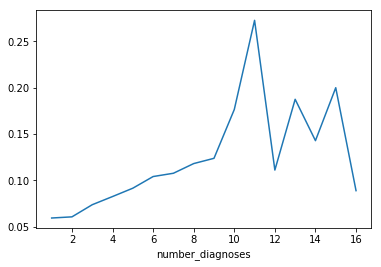

In [30]:
by_number_diagnoses_n.transpose()['<30'].plot()

In [22]:
by_number_emergency = pd.crosstab(df.readmitted, df.number_emergency)
by_number_emergency.index = df_labels['readmitted']
by_number_emergency_n = by_number_emergency / by_number_emergency.sum()
by_number_emergency_n

number_emergency,0,1,2,3,4,5,6,7,8,9,...,25,28,29,37,42,46,54,63,64,76
NO,0.561057,0.407060,0.329089,0.281379,0.184492,0.197917,0.159574,0.095890,0.18,0.090909,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
<30,0.104743,0.143546,0.182664,0.202759,0.307487,0.244792,0.234043,0.260274,0.32,0.363636,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
>30,0.334200,0.449394,0.488247,0.515862,0.508021,0.557292,0.606383,0.643836,0.50,0.545455,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0


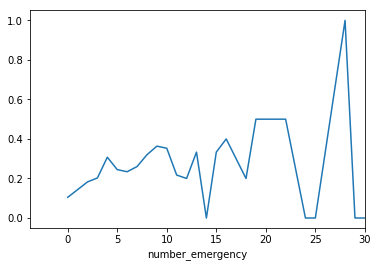

In [28]:
by_number_emergency_n.transpose()['<30'].plot(xlim=(None, 30))